<table align="left" width=100%>
    <tr>
        <td width="20%">
        </td>
        <td>
        <div align="center">
                <font color="#21618C" size=11px>
                  <b> Retail Sales Analysis </b>
                </font>
        </div>
        </td>
    </tr>
</table>

## Table of Contents

1. **[Introduction](#introduction)**
2. **[Import Libraries](#import_lib)**
3. **[Read Data](#Read_Data)**
4. **[Dataset Overview](#overview)**
    - 4.1 - [Data Description](#Data_description)
      
5. **[Data Pre-Processing](#preprocess)**
    - 5.1 - [Missing values](#missing)
    - 5.2 - [Data Formatting and Transformation](#data_trans)
    - 5.3 - [Duplicate values](#duplicate)
    - 5.4 - [Outliers](#outliers)
6. **[Exploratory Data Analysis](#eda)**
    - 6.1 - [Sales Trends Over Time](#trend)
    - 6.2 - [Category-Wise Sales](#sales_cat)
    - 6.3 - [Sales by Month of the year](#month)
    - 6.4 - [Customer Visits Count](#cust_count)
    - 6.5 - [Sales by Day of the Week](#day)
    - 6.6 - [Sales by Hour of the Day](#hour)
    - 6.7 - [Gender and Category Analysis](#gen_cat)
    - 6.8 - [Average Sales per Customer](#sales_avg)
    - 6.9 - [Total sales per Customer](#sales_total)

7. **[Recency Frequency Monetary Analyis](#rfm)**
8. **[Insights](#insights)**
9. **[Conclusion](#conclusion)**

# 1. Introduction <a id = "introduction"></a>

The **Retail Sales Analysis** project aims to uncover key insights from retail sales data to assist businesses in making informed decisions. By exploring patterns, this study identifies trends, customer behaviors, and potential areas of growth.



# 2. Import Libraries <a id='import_lib'></a>

In [1]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# 3. Read Data <a id = "Read_Data"></a>

In [2]:
df = pd.read_csv('Retail Sales Analysis_utf.csv')

# printing first 5 rows
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


# 4. Dataset Overview <a id = "overview"></a>

## Data description <a id = "Data_description"></a>

In [3]:
# to get the number of rows and columns
df.shape

(2000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


The dataset contains 2000 entries with 16 attributes—such as transaction ID, sale date, customer information, product category, sales, and costs—that make up the dataset.

# 5. Data Preprocessing <a id = "preprocess"></a>

## 5.1 Missing Values <a id = "missing"></br>

In [5]:
# count of missing values
df.isnull().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

Initial missing values:<br>
Age: 10<br>
Quantity, Price Per Unit, COGS, and Total Sale: 3 each<br>

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

Removed rows with missing data to ensure analysis accuracy.

## 5.2 Data Formatting and Transformation<a id = "data_trans"></a>

In [7]:
print(df['sale_date'])

0       2022-11-05
1       2022-07-09
2       2022-12-12
3       2022-01-06
4       2022-11-14
           ...    
1995    2022-11-09
1996    2022-09-12
1997    2023-10-08
1998    2023-11-22
1999    2022-09-23
Name: sale_date, Length: 1987, dtype: object


In [8]:
# date format
df['sale_date'] = pd.to_datetime(df['sale_date'])
print(df['sale_date'])

0      2022-11-05
1      2022-07-09
2      2022-12-12
3      2022-01-06
4      2022-11-14
          ...    
1995   2022-11-09
1996   2022-09-12
1997   2023-10-08
1998   2023-11-22
1999   2022-09-23
Name: sale_date, Length: 1987, dtype: datetime64[ns]


Date data type was formatted correctly.

## 5.3 Duplicate Data <a id = "duplicate"></a>

In [9]:
# checking duplicates
df.duplicated().sum()

0

No rows in the data are duplicated.

## 5.4 Outliers <a id = "outliers"></a>

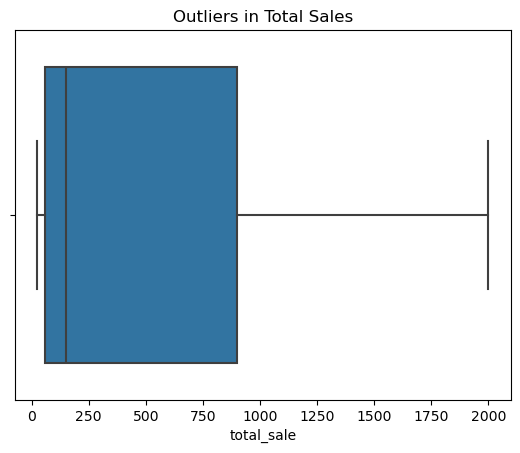

In [10]:
#Look for outliers in sales data
sns.boxplot(x=df['total_sale'])
plt.title('Outliers in Total Sales')
plt.show()

There are no outliers in the dataset

# 6. Exploratory Data Analysis (EDA) <a id='eda'></a>

## 6.1 Sales Trends Over Time <a id = "trend"></a>

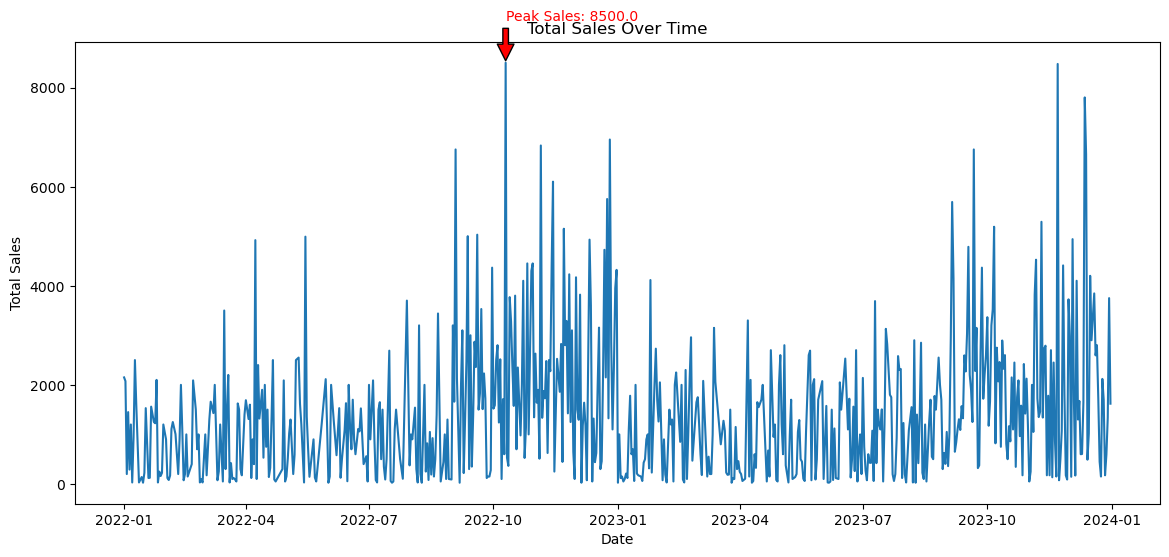

In [11]:
#Plot sales over time and add annotations

sales_over_time = df.groupby('sale_date')['total_sale'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time, x='sale_date', y='total_sale')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')

max_sales = sales_over_time['total_sale'].max()
max_date = sales_over_time[sales_over_time['total_sale'] == max_sales]['sale_date'].values[0]
plt.annotate(f'Peak Sales: {max_sales}', xy=(max_date, max_sales), xytext=(max_date, max_sales*1.1),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
plt.show()

 Analyzes the evolution of sales over time, highlighting the peak with an annotation. 

## 6.2 Category-Wise Sales <a id = "sales_cat"></a>

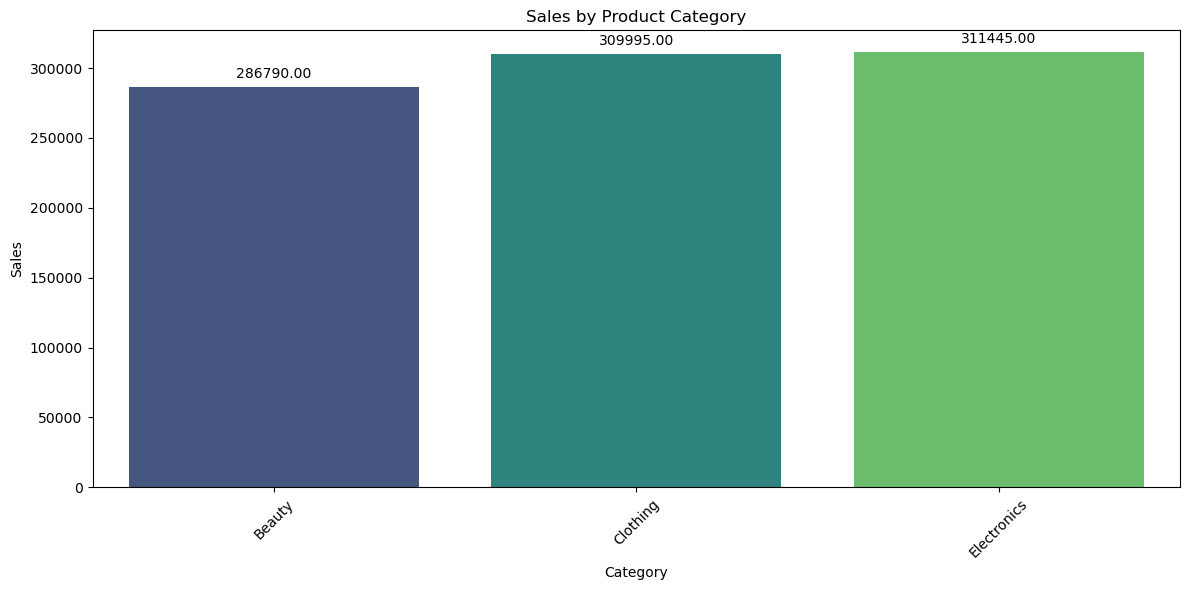

In [12]:
plt.figure(figsize=(12, 6))

# Calculate total sales by category
category_sales = df.groupby('category')['total_sale'].sum().reset_index()

# Create barplot
sns.barplot(data=category_sales, x='category', y='total_sale', palette='viridis')

# Add values on top of the bars
for index, row in category_sales.iterrows():
    plt.text(
        x=index, 
        y=row['total_sale'] + 0.02 * category_sales['total_sale'].max(),  # Position slightly above the bar
        s=f"{row['total_sale']:.2f}",  # Format value
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.tight_layout()
plt.show()

With the highest sales revenue, electronics is in the lead.<br>
Compared to beauty products, clothing shows encouraging growth.

## 6.3 Sales by Month of the year <a id = "month"></a>

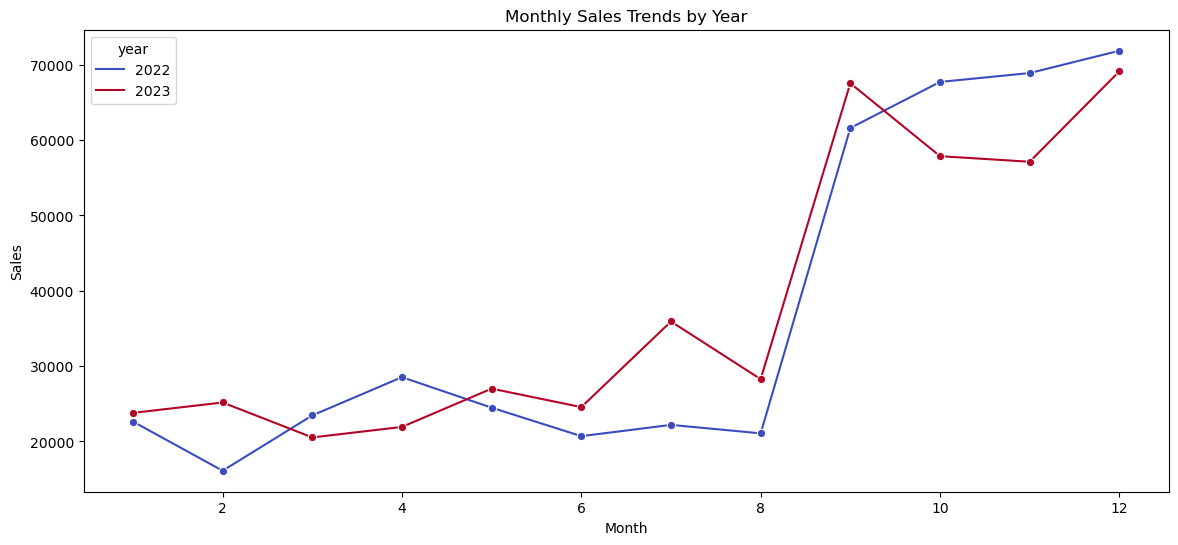

In [13]:
df['month'] = df['sale_date'].dt.month
df['year'] = df['sale_date'].dt.year
monthly_sales = df.groupby(['year', 'month'])['total_sale'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_sale', hue='year', marker='o', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends by Year')
plt.show()

Sales peak from September to December in both years, likely due to the holiday season.<br>
2023 consistently outperforms 2022, especially in the latter months, indicating growth or improved strategies.<br>
**Insights:**<br>
Focus on September to December for resource allocation and promotional efforts.<br>
Explore strategies to boost sales during the off-season (February to July).

## 6.4 Customer Visits Count <a id ="cust_count"></a>

In [14]:
# Group by 'customer_id' and count the number of visits
customer_visit_count = df.groupby('customer_id').size().reset_index(name='visit_count')
print(customer_visit_count)

     customer_id  visit_count
0              1           76
1              2           69
2              3           76
3              4           73
4              5           63
..           ...          ...
150          151            7
151          152            6
152          153            3
153          154            4
154          155            9

[155 rows x 2 columns]


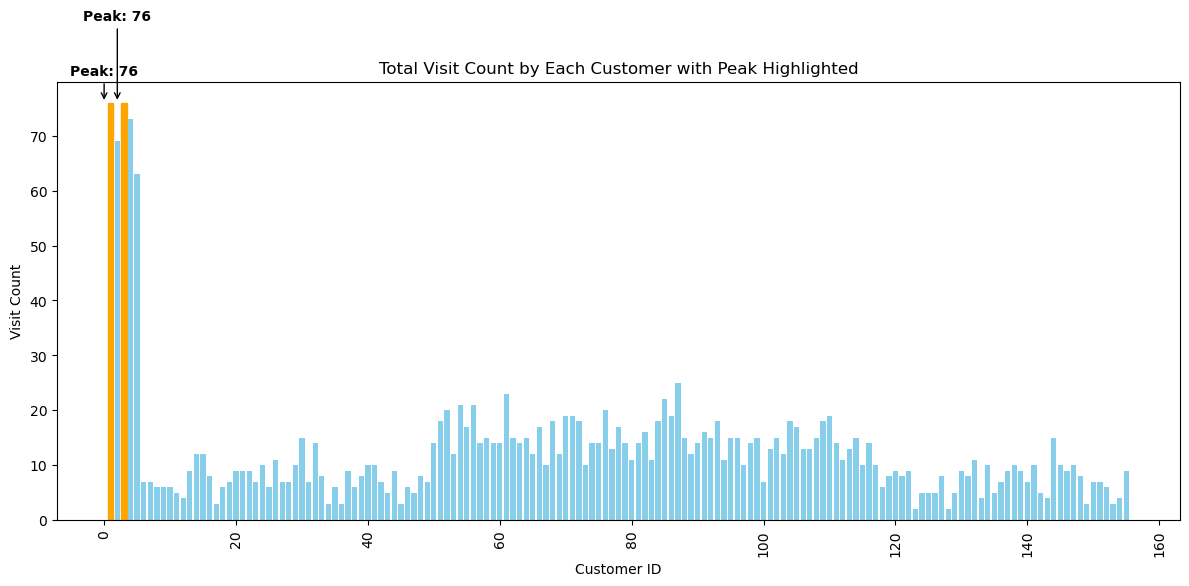

In [15]:
# Plotting total visit count per customer
plt.figure(figsize=(12, 6))
bars = plt.bar(customer_visit_count['customer_id'], customer_visit_count['visit_count'], color='skyblue')

# Find all customers with the maximum visit count
peak_count = customer_visit_count['visit_count'].max()
peak_customers = customer_visit_count[customer_visit_count['visit_count'] == peak_count]

# Highlight all peak customer bars
for i, index in enumerate(peak_customers.index):
    bars[index].set_color('orange')  # Set peak bar color

    # Add annotations for each peak with staggered offsets
    stagger_offset = 5 + (i % 2) * 10  # Alternate offsets to avoid overlap
    plt.annotate(
        f"Peak: {peak_count}",
        xy=(index, peak_count),
        xytext=(index, peak_count + stagger_offset),  # Offset based on index
        ha='center', color='black', fontweight='bold',
        arrowprops=dict(facecolor='black', arrowstyle="->")
    )

# Labels and title
plt.title('Total Visit Count by Each Customer with Peak Highlighted')
plt.xlabel('Customer ID')
plt.ylabel('Visit Count')
plt.xticks(rotation=90)  # Rotate customer IDs for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

To find out how frequently customers shop, visit data is aggregated by customer_id, with the highest frequency highlighted by annotation.

## 6.5 Sales by Day of the Week <a id = "day"></a>

In [16]:
# Ensure 'sale_date' is in datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Extract the day of the week (full name)
df['day_of_week'] = df['sale_date'].dt.day_name()

print(df[['sale_date', 'day_of_week']].head())

   sale_date day_of_week
0 2022-11-05    Saturday
1 2022-07-09    Saturday
2 2022-12-12      Monday
3 2022-01-06    Thursday
4 2022-11-14      Monday


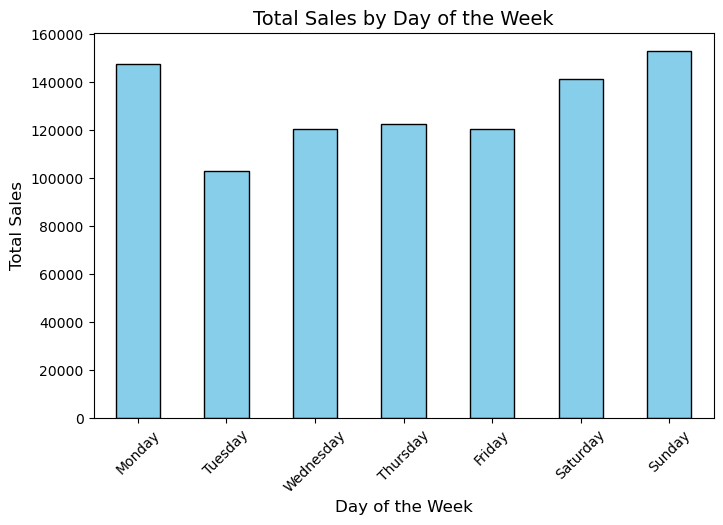

In [17]:
# Group by day of the week and calculate total sales
sales_by_day = df.groupby('day_of_week')['total_sale'].sum()

# Define the correct order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to sort days in proper order
sales_by_day = sales_by_day.reindex(day_order)

plt.figure(figsize=(8, 5))
sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Day of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Monday has the highest total sales, indicating strong early-week customer activity.<br>
Sunday also shows high sales, likely due to weekend shopping trends.<br>
**Insights:**<br>
Leverage Monday and Sunday for promotional activities to maximize revenue.

## 6.6 Sales by Hour of the Day <a id = "hour"></a>

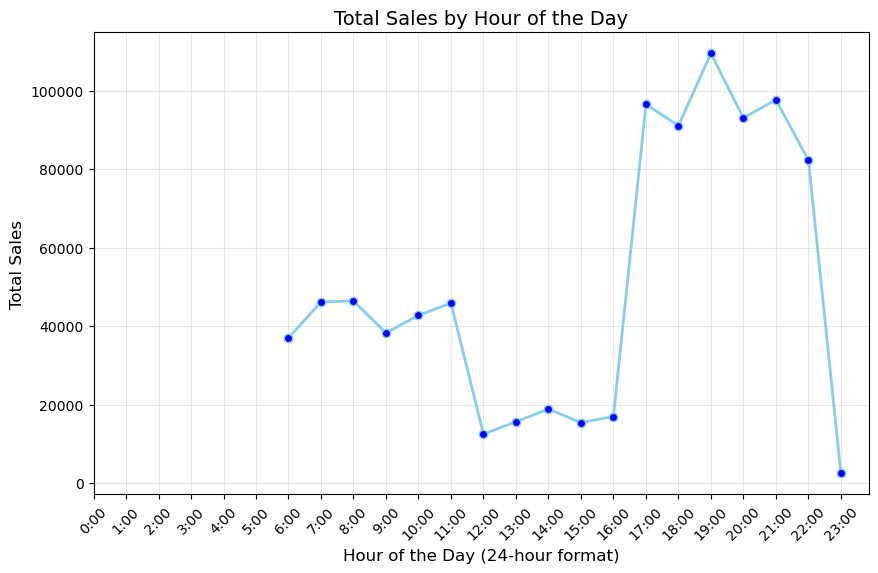

In [18]:
# Extract the hour from 'sale_time'
df['sale_time'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S')  # Ensure 'sale_time' is datetime
df['hour'] = df['sale_time'].dt.hour  # Extract hour

# Group by hour and calculate total sales
sales_by_hour = df.groupby('hour')['total_sale'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markerfacecolor='blue')
plt.title('Total Sales by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f'{hour}:00' for hour in range(0, 24)], rotation=45)  # Format x-axis labels
plt.grid(alpha=0.3)
plt.show()

The majority of sales take place between 5:00 and 10:00 p.m., which is crucial for focused promotions.

## 6.7 Gender and Category Analysis <a id = "gen_cat"></a>

In [19]:
# Group by 'gender' and 'category', and count the number of visits
gender_category_visits = df.groupby(['gender', 'category']).size().unstack(fill_value=0)
print(gender_category_visits)

category  Beauty  Clothing  Electronics
gender                                 
Female       330       347          335
Male         281       351          343


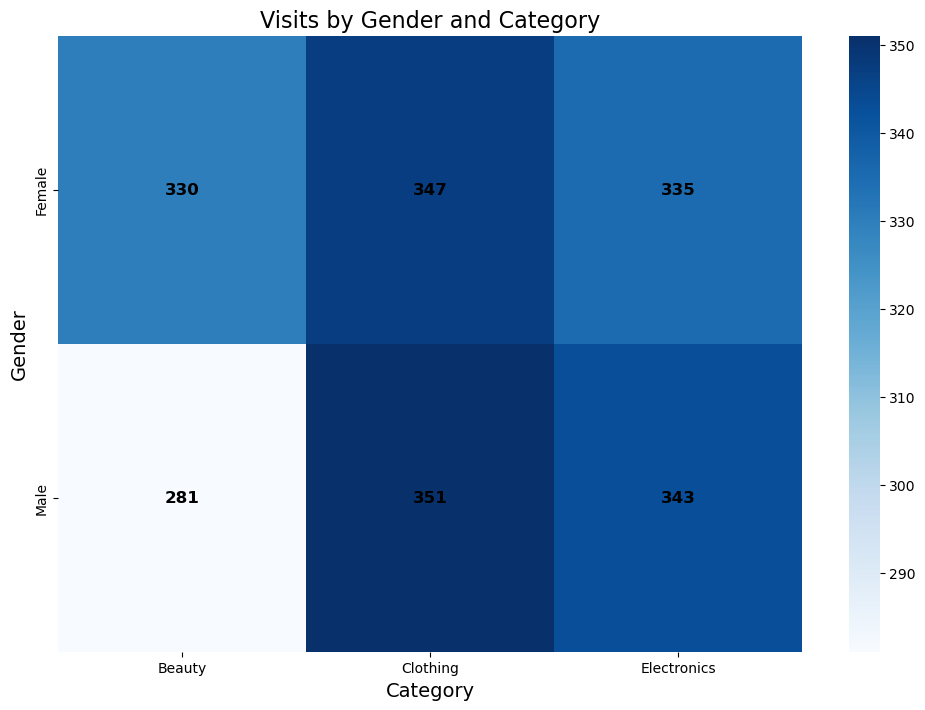

In [20]:
# Plot heatmap with no annotations inside
plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
ax = sns.heatmap(gender_category_visits, annot=False, fmt='g', cmap='Blues', cbar=True)

# Add the visit counts on top of each cell
for y in range(gender_category_visits.shape[0]):  # Iterate over rows (genders)
    for x in range(gender_category_visits.shape[1]):  # Iterate over columns (categories)
        count = gender_category_visits.iloc[y, x]
        ax.text(x + 0.5, y + 0.5, str(count), 
                ha='center', va='center', 
                fontsize=12, weight='bold', color='black')

# Add labels and title
plt.title('Visits by Gender and Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.show()

Clothing is the most visited category for both males and females, with 351 visits by males and 347 visits by females.<br>
Electronics shows a similar level of interest across genders, with 343 visits by males and 335 visits by females.<br>
Beauty is predominantly visited by females (330 visits) compared to males (281 visits).<br>

## 6.8 Average Sales per Customer <a id = "sales_avg"></a>

In [21]:
# Calculate average sales per customer
avg_sales_per_customer = df.groupby('customer_id')['total_sale'].mean()

# Top 5 customers by average spending
top_customers = avg_sales_per_customer.sort_values(ascending=False).head()
print("Top 5 Customers by Average Spending:")
print(top_customers)

Top 5 Customers by Average Spending:
customer_id
34     1366.666667
142    1192.000000
11     1140.000000
45     1100.000000
36      996.666667
Name: total_sale, dtype: float64


The customers listed above have the highest average spending per transaction.<br>
These clients are probably purchasing high-value goods and make premium purchases each transaction. Focusing on personalized offers, loyalty programs, or exclusive deals could enhance their shopping experience and retention.

## 6.9 Total sales per Customer <a id = "sales_total"></a>

In [22]:
# Calculate total sales per customer
total_sales_per_customer = df.groupby('customer_id')['total_sale'].sum()

# Top 5 customers by total spending
top_customers_ = total_sales_per_customer.sort_values(ascending=False).head()
print("Top 5 Customers by Total Spending:")
print(top_customers_)

Top 5 Customers by Total Spending:
customer_id
3    38440.0
1    30750.0
5    30405.0
2    25295.0
4    23580.0
Name: total_sale, dtype: float64


These customers have the highest cumulative spending over the entire dataset.<br>
These customers are the most valuable in terms of overall revenue. Offering discounts, priority service, or special rewards could increase their loyalty and promote recurring business.

# 7. Requency Frequency Monetary Analysis <a id = "rfm"></a>

RFM metrics capture the key aspects of customer behavior:

Recency (R): When was the customer's most recent purchase?<br>
Frequency (F): How often the customer has made purchases.<br>
Monetary (M): The total money spent by the customer.<br>
These metrics cover three important aspects of customer value, making them relevant for segmentation.

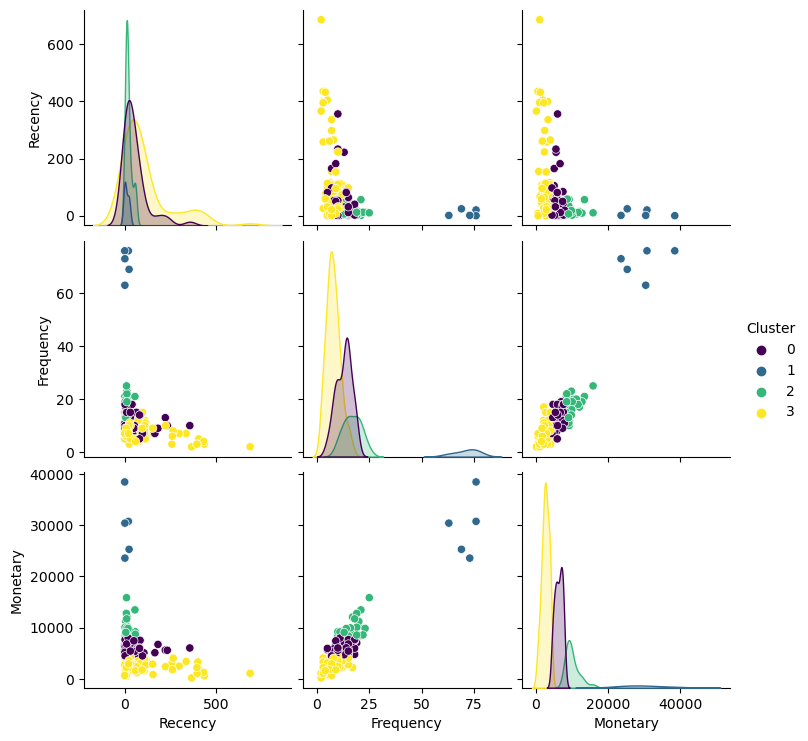

In [23]:
# Recency
latest_date = df['sale_date'].max()
recency = df.groupby('customer_id').agg({'sale_date': lambda x: (latest_date - x.max()).days})

# Frequency and Monetary
frequency = df.groupby('customer_id').size()
monetary = df.groupby('customer_id')['total_sale'].sum()

# Combining RFM metrics
rfm = pd.DataFrame({'Recency': recency['sale_date'], 'Frequency': frequency, 'Monetary': monetary})

# Clustering customers (e.g., using K-Means)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Visualizing clusters
sns.pairplot(rfm, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

In [24]:
rfm_with_clusters = rfm.reset_index()  # Ensure 'customer_id' is part of the dataframe
print(rfm_with_clusters[['customer_id', 'Cluster']])

     customer_id  Cluster
0              1        1
1              2        1
2              3        1
3              4        1
4              5        1
..           ...      ...
150          151        3
151          152        3
152          153        3
153          154        3
154          155        3

[155 rows x 2 columns]


In [25]:
# Example: Get all customers in Cluster 2
cluster_2_customers = rfm_with_clusters[rfm_with_clusters['Cluster'] == 2].head()

print(cluster_2_customers[['customer_id', 'Recency', 'Frequency', 'Monetary']])

    customer_id  Recency  Frequency  Monetary
28           29       15         10    8455.0
51           52       13         20   10325.0
53           54       56         21   13475.0
54           55       14         17   12080.0
55           56        1         21    8460.0


In [26]:
# Summarize RFM metrics by cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',    # Average recency for the cluster
    'Frequency': 'mean',  # Average frequency for the cluster
    'Monetary': 'mean'    # Average monetary value for the cluster
}).assign(Customer_Count=rfm.groupby('Cluster').size())  # Add customer count separately

print(cluster_summary)

            Recency  Frequency      Monetary  Customer_Count
Cluster                                                     
0         52.800000  12.800000   6303.700000              50
1          9.200000  71.400000  29694.000000               5
2         19.666667  16.833333  10101.458333              24
3        110.881579   7.710526   2659.736842              76


**Cluster 0** (Regular Buyers):<br>
Average recency, frequency, and spending.<br>
**Cluster 1** (High-Value, Irregular Buyers):<br>
High spenders but not recent or frequent.<br>
**Cluster 2** (Loyal Customers):<br>
Recent buyers with high frequency and spending.<br>
**Cluster 3** (Inactive Customers):<br>
Long-dormant buyers with low spending.

# 8. Insights <a id = "insights"></a>

**Sales Trends**

Mondays and evening hours (5 PM–8 PM) see the highest sales, highlighting opportunities to maximize operations and marketing efforts during these peak periods.
A significant spike in sales occurs during the last quarter (October to December), likely due to holiday shopping, requiring strategic planning for inventory and promotions.

**Customer Segmentation**

High-value customers (Cluster 1) contribute disproportionately to revenue with frequent and large purchases. Retention strategies, such as loyalty rewards, are critical for this segment.
Low-value customers (Cluster 3) present untapped potential and should be targeted with re-engagement campaigns to increase their activity and spending.

**Customer Spending Patterns**

The top five customers by total spending are major contributors to revenue. Personalized offers and exclusive deals could further strengthen their loyalty.
Average spending highlights trends across customer segments, providing insights into product bundling or premium product promotions.

**Gender-Based Insights**

Male and female customers exhibit distinct category preferences, presenting an opportunity for targeted marketing campaigns tailored to each group’s buying behavior.

**Opportunities for Growth**

Mid-week sales and off-peak hours show room for improvement, which could be addressed through flash sales or mid-week discounts.
Strengthening engagement with inactive or low-frequency customers can boost overall revenue and reduce customer churn.

# Conclusion <a id = "conclusion"></a>

The Retail Sales Analysis revealed valuable insights into customer behavior, sales trends, and category performance. Key findings highlight the importance of targeting peak sales periods, optimizing product offerings, and implementing customer segmentation strategies. By focusing on high-value customers, re-engaging less frequent buyers, and tailoring marketing efforts based on gender and category preferences, the business can enhance revenue generation and customer satisfaction. These data-driven strategies provide a strong foundation for informed decision-making and sustained growth in a competitive retail environment.